#### Kaggle Competition #1

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import io
df_train = pd.read_csv(io.BytesIO(uploaded['Trout_training.csv']))
Context
Lake monitoring provides important information for environment protection and pollution identification, such as temperature/thermal monitoring. In this Kaggle task, we will provide thermal sensor data for Late Trout and ask you to predict/estimate the temperature at a certain depth.
#df_test = pd.read_csv(io.BytesIO(uploaded['Trout_testing_features.csv']))

NameError: ignored

**Context**

Lake monitoring provides important information for environment protection and pollution identification, such as temperature/thermal monitoring. In this Kaggle task, we will provide thermal sensor data for Late Trout and ask you to predict/estimate the temperature at a certain depth.



**Content**

We provide Lake Trout’s data during the period of Apr 20th, 2012 - Apr 19th, 2018.

The lake has multiple sensors at different depths, and we will provide date-time, depth and the corresponding temperature at this depth and time point. Therefore, you will see the following columns, with Date_time representing the time stamp, Depth_m representing the depth in meters, and Water_Temp_C representing the temperature in Celsius.

**Task**

Predicting/estimating the temperature of Trout Lake at depth 10.5 m during Apr 20th, 2018 - Apr 19th, 2019. Please feel free to use part of/all the data we provide. 

**Files for task**

For this task, we will provide you a file Trout_training.csv which contains all the sensors in the Trout Lake as training. Besides, we will give you another Trout_testing_features.csv which contains all other sensors’ temperature (except the depth 10.5’s temperature). 

We hope you return a file named Trout_prediction.csv, the dataset you return and upload should have two columns: Date_Time and Water_Temp_C, with a shape of 8,760 * 2. (Reason for 8,760: 8,760 =  365 days * 24 sensorings/day) You are supposed to predict every hour’s temperature of depth-10.5 sensor during  Apr 20th, 2018 - Apr 19th, 2019.



In [ ]:
# import needed packages
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# 1. Import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_path = '/content/drive/Shareddrives/SI670 Kaggle/data/Trout_testing_features.csv'
train_path = '/content/drive/Shareddrives/SI670 Kaggle/data/Trout_training.csv'

In [ ]:
import pandas as pd
df_test = pd.read_csv(test_path)
df_train = pd.read_csv(train_path)

### Check the imported datasets

In [ ]:
df_train.head()

,Date_Time,Water_Temp_C,Depth_m
0,2012-04-20 00:00:00,5.257,1.5
1,2012-04-20 00:00:00,5.257,2.5
2,2012-04-20 00:00:00,5.257,3.5
3,2012-04-20 00:00:00,5.205,4.5
4,2012-04-20 00:00:00,5.205,5.5


In [ ]:
df_test.head()

,Date_Time,Water_Temp_C,Depth_m
0,2018-04-20 00:00:00,0.412,1.5
1,2018-04-20 00:00:00,0.852,2.5
2,2018-04-20 00:00:00,0.907,3.5
3,2018-04-20 00:00:00,0.962,4.5
4,2018-04-20 00:00:00,1.071,5.5


# 2. Preprocessing

### Changing data_time format

In [ ]:
df_train['Date_Time'] = pd.to_datetime(df_train['Date_Time'])
df_train['Date_Time'] = df_train['Date_Time'].dt.strftime('%-m/%-d/%Y %-H:%M')

In [ ]:
df_train.head()

,Date_Time,Water_Temp_C,Depth_m
0,4/20/2012 0:00,5.257,1.5
1,4/20/2012 0:00,5.257,2.5
2,4/20/2012 0:00,5.257,3.5
3,4/20/2012 0:00,5.205,4.5
4,4/20/2012 0:00,5.205,5.5


In [ ]:
df_test['Date_Time'] = pd.to_datetime(df_test['Date_Time'])
df_test['Date_Time'] = df_test['Date_Time'].dt.strftime('%-m/%-d/%Y %-H:%M')

In [ ]:
df_test.head()

,Date_Time,Water_Temp_C,Depth_m
0,4/20/2018 0:00,0.412,1.5
1,4/20/2018 0:00,0.852,2.5
2,4/20/2018 0:00,0.907,3.5
3,4/20/2018 0:00,0.962,4.5
4,4/20/2018 0:00,1.071,5.5


# 3. Exploratory Analysis

In [ ]:
df_train.describe()

,Water_Temp_C,Depth_m
count,839215.000000,839215.000000
mean,6.336614,9.628875
std,5.591335,5.557104
min,0.273000,1.500000
25%,1.994000,4.500000
50%,5.050000,9.500000
75%,8.245000,14.500000
max,25.768000,20.500000


### Check the relations between the seasonality and the lake temperature (df.groupby(date))




In [ ]:
season_temp = df_train.groupby('Date_Time')['Water_Temp_C'].mean()

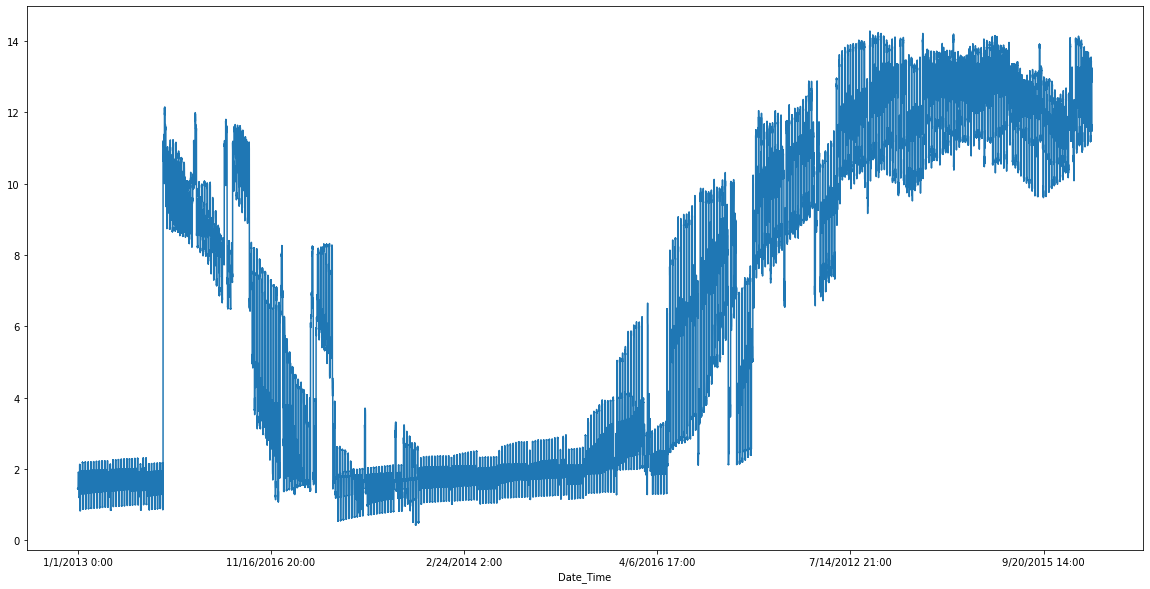

In [ ]:
season_temp.plot()

### Check the relations between the depth and the lake temperature (df.groupby(depth))

In [ ]:
depth_temp = df_train.groupby('Depth_m')['Water_Temp_C'].mean()

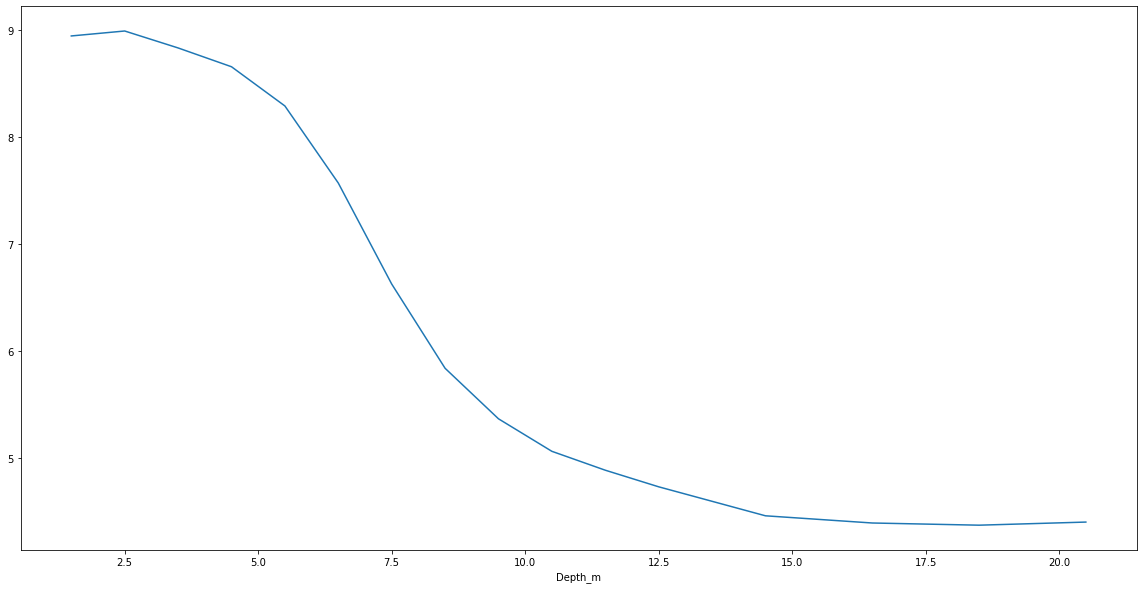

In [ ]:
depth_temp.plot()

### Year - temp changes

In [ ]:
df_datetime = df_train

In [ ]:
df_datetime.index = pd.to_datetime(df_datetime['Date_Time'],format='%m/%d/%Y %H:%M')

Date_Time
2012    AxesSubplot(0.125,0.2;0.775x0.68)
2013    AxesSubplot(0.125,0.2;0.775x0.68)
2014    AxesSubplot(0.125,0.2;0.775x0.68)
2015    AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.2;0.775x0.68)
2017    AxesSubplot(0.125,0.2;0.775x0.68)
2018    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Water_Temp_C, dtype: object

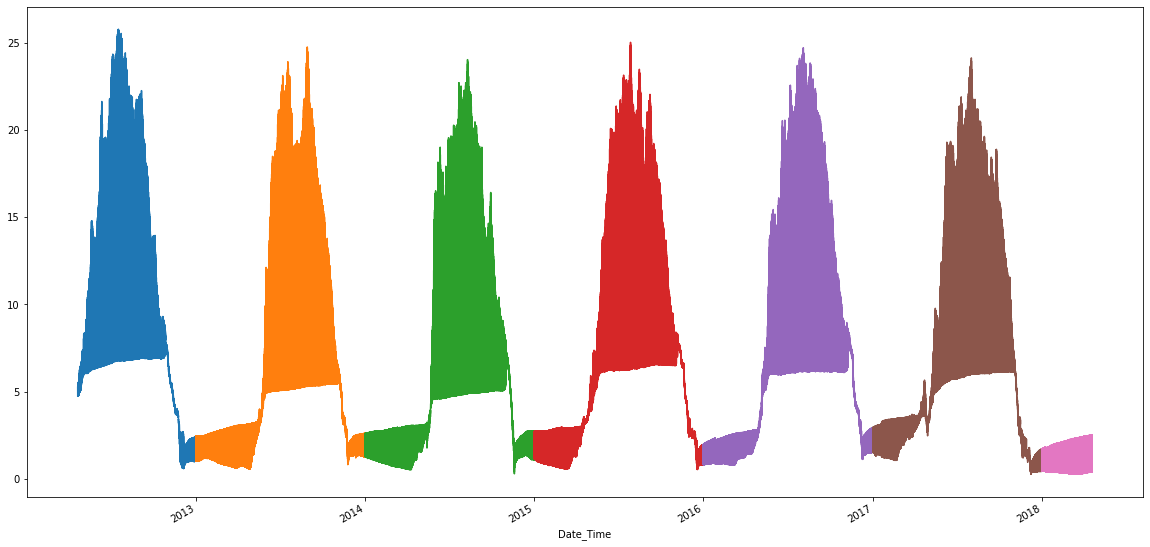

In [ ]:
df_datetime.groupby(by=df_datetime.index.year)['Water_Temp_C'].plot()

### Month - temp

Date_Time
1     AxesSubplot(0.125,0.2;0.775x0.68)
2     AxesSubplot(0.125,0.2;0.775x0.68)
3     AxesSubplot(0.125,0.2;0.775x0.68)
4     AxesSubplot(0.125,0.2;0.775x0.68)
5     AxesSubplot(0.125,0.2;0.775x0.68)
6     AxesSubplot(0.125,0.2;0.775x0.68)
7     AxesSubplot(0.125,0.2;0.775x0.68)
8     AxesSubplot(0.125,0.2;0.775x0.68)
9     AxesSubplot(0.125,0.2;0.775x0.68)
10    AxesSubplot(0.125,0.2;0.775x0.68)
11    AxesSubplot(0.125,0.2;0.775x0.68)
12    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Water_Temp_C, dtype: object

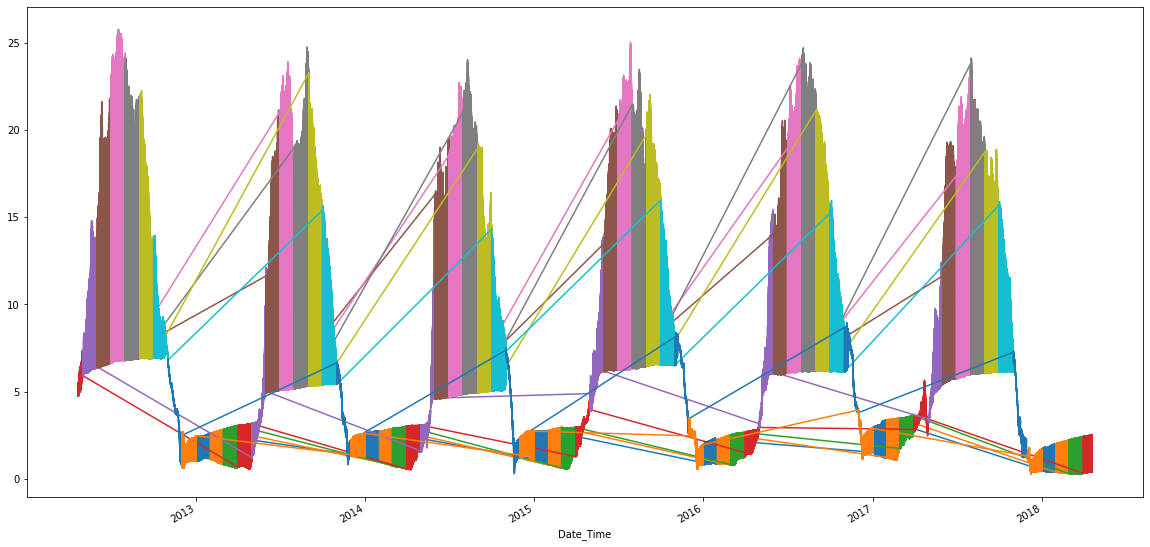

In [ ]:
df_datetime.groupby(by=df_datetime.index.month)['Water_Temp_C'].plot()

### Daily Cycle

In [ ]:
hourly = df_datetime['Water_Temp_C'].groupby(df_datetime.index.hour).mean()

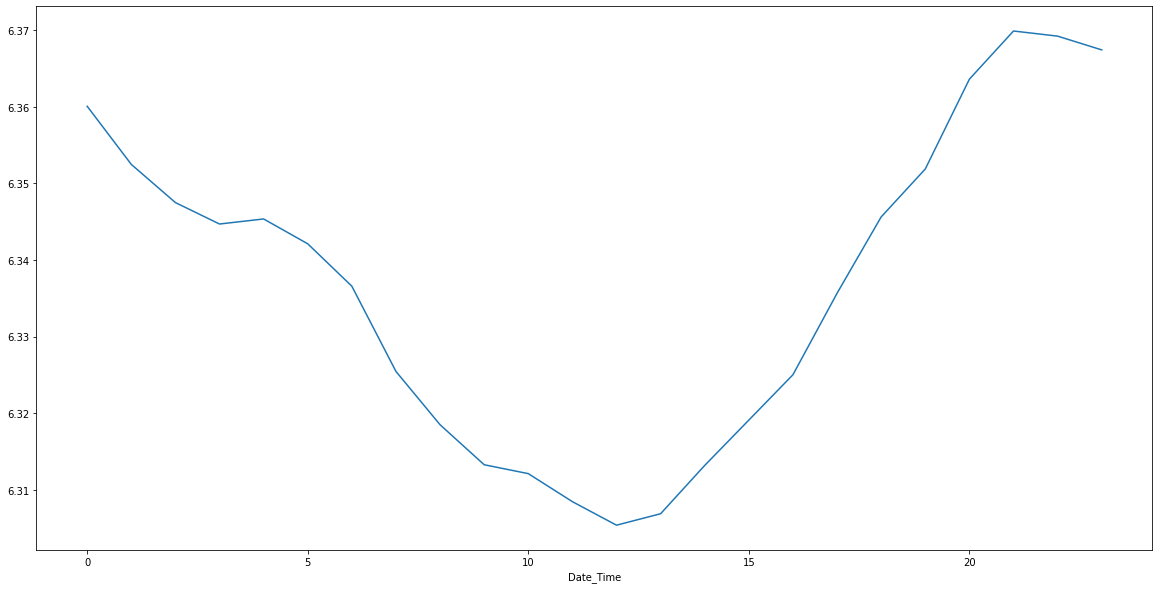

In [ ]:
hourly.plot()